In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import glob
import pyart
import pytda
import awot
import pyradarmet
from netCDF4 import date2num
from awot.graph import create_basemap, FlightLevel, RadarHorizontalPlot
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/IPython/.*')

/Users/guy/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/guy/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/guy/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/guy/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Met

In [2]:
filename = '/Users/guy/data/pecan/nex2/kuex/KUEX20150611_031925_turb.nc'
#KUEX20150611_031925_V06.gz'
rKUEX = pyart.io.read(filename)

fCHILL = '/Users/guy/data/t28/tcad1999/CHILL/chill_cfrad_turb_19990611_210817.nc'
rfiles = sorted(glob.glob(os.path.join('/Users/guy/data/t28/tcad1999/', 'CHILL')+'/chill*.nc'))
rCHILL = pyart.io.read(fCHILL)

In [3]:
def join_radars(r1, r2):
    rj = pyart.util.radar_utils.join_radar(r1, r2)
    return rj

rflist = []
for filen, filer in enumerate(rfiles):
    rflist.append(pyart.io.read(filer))

rCHILLj = join_radars(rflist[0], rflist[1])
for rad in rflist[2:]:
    rCHILLj.time['data'] = date2num(rCHILLj.time['data'], rCHILLj.time['units'])
    rCHILLj = join_radars(rCHILLj, rad)

In [4]:
name_map = {
#        'time': 'time',
            # Aircraft Position
            'longitude': 'LONC',
            'latitude': 'LATC',
            'altitude': 'ztrue',
            'pressure_altitude': 'PALT',
            'tas': 'tas',
            'ias': 'aias',
            'true_heading': 'AVthead',
            'pitch': 'AVpitch',
            'roll_angle': 'AVroll',
            # Atmospheric State
            'pressure': 'pmb',
            'temperature': 'trf',
            'dewpoint_temperature': 'tdplicor',
            'thetad': 'thetad',
            'thetae': 'thetae',
            'relative_humidity': 'rh',
            'mixing_ratio': 'mr',
            'lwc': 'lwc100',
            'turb': 'turb',
            'g_accel': 'avnorma',
            # Radiometric
            'irtop': 'irtc',
            'irbottom': 'irbc',
            'swtop': 'swt',
            'swbottom': 'swb',
            # Wind derivations
            'Uwind': 'avuwind',
            'Vwind': 'avvwind',
            'Wwind': 'avwwind',
            'longitudinal_wind': 'avux',
            'latitudinal_wind': 'avvy',
            'wind_dir': 'avwdir',
            'wind_spd': 'axwmag',
            # Licor Concentrations
            'co2_conc': 'co21s',
            'h2o_conc': 'h2o1s',
            # Aerosol
            'pcasp_num': 'AS200_OBR',
            'pcasp_conc': 'CS200_OBR',
            'pcasp_mean_diam': 'DBARP_OBR',
            'pcasp_surf_area_conc': 'PSFCP_OBR',
            'pcasp_vol_conc': 'PVOLP_OBR',
            # Cloud Physics
            'conc_cpc': 'cpc_conc',
            # Miscellaneous
            'topo': 'topo'}

#flight = awot.io.read_netcdf(os.path.join('/Users/guy/data/pecan', '20150611.c50.nc'), mapping_dict=name_map)
fltKA = awot.io.read_netcdf(os.path.join('/Users/guy/data/pecan', '20150611.c1.nc'), mapping_dict=name_map)
flt28 = awot.io.read_netcdf(os.path.join('/Users/guy/data/t28/tcad1999','flight', 'T28_TCAD1999_728.nc'), time_var='Time', platform='T-28')

Using 'time' to make AWOT time variable
Using 'Time' to make AWOT time variable


In [5]:
bwKUEX = rKUEX.instrument_parameters['radar_beam_width_h']['data'][0]

In [6]:
# Run PyTDA on the KUEX radar instance Can run once and save to cfradial for future use
#pytda.calc_turb_vol(rKUEX, name_sw='SW', name_dz='REF', verbose=False,
#                    gate_spacing=250.0/1000.0, use_ntda=False, beamwidth=bwKUEX)


#ffs = sorted(glob.glob(os.path.join('/Users/guy/data/pecan/nex2', 'kuex')+'/KUEX*_V06.gz'))
#for ff in ffs:
#    print(ff)
#    os.system('gzip -d '+ff)
#    rKUEX = pyart.aux_io.read_radx(ff[:-3])
#    os.system('gzip '+ff[:-3])
#    pytda.calc_turb_vol(rKUEX, name_sw='SW', name_dz='REF', verbose=False,
#                        gate_spacing=250.0/1000.0, use_ntda=False, beamwidth=bwKUEX)
#    
#    rndir = os.path.dirname(ff)
#    rnf = os.path.basename(ff).split('.')[0][:-3] + 'turb.nc'
#    pyart.io.write_cfradial(os.path.join(rndir, rnf), rKUEX)
    
#    print("Saving...%s"%os.path.join(rndir, rnf))

In [7]:
uwka_set = ["2015-06-11T03:18:00", "2015-06-11T03:22:00"]
lonl, latl = [-99., -97], [39.5, 41.]
radsweep = 2
rnglim, htlim, reflim, turblim = (0., 75.), (0., 5.), (0., 60.), (0., 1.)
rlat, rlon = rKUEX.latitude['data'][0], rKUEX.longitude['data'][0]

t28_set = ["1999-06-11T21:06:00", "1999-06-11T21:15:00"]
lonlt28, latlt28 = [-104.8, -103.7], [40.7, 41.3]
chsweep = 4
chlat, chlon = rCHILL.latitude['data'][0], rCHILL.longitude['data'][0]

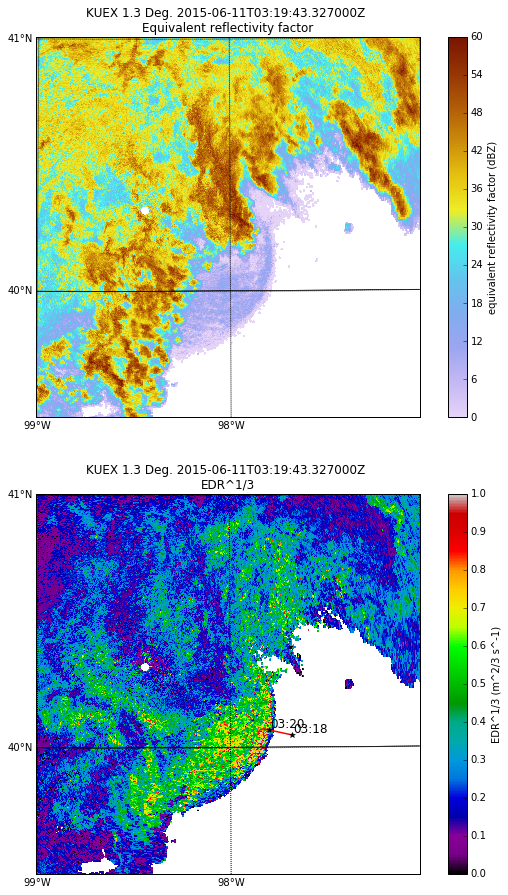

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10.0, 15.))
displayKUEX = pyart.graph.RadarMapDisplay(rKUEX)
#ax = fig.add_subplot(nrows, 2, index+1)
displayKUEX.plot_ppi_map('REF', radsweep, vmin=0., vmax=60.,
            min_lon=lonl[0], max_lon=lonl[1], min_lat=latl[0], max_lat=latl[1],
            cmap='pyart_LangRainbow12',projection='aeqd', resolution='l',
            lat_0=rlat, lon_0=rlon, colorbar_flag=False, ax=ax1)
displayKUEX.plot_colorbar(ax=ax1)
f2 = FlightLevel(fltKA, basemap=displayKUEX.basemap)
f2.plot_trackmap(min_altitude=50., lw=2.5, track_color='red',
                start_time=uwka_set[0], end_time=uwka_set[1],)
f2.time_stamps(start_time=uwka_set[0], end_time=uwka_set[1],
                           labelspacing=120)


displayKUEX.plot_ppi_map('turbulence', radsweep, vmin=0., vmax=1.,
            min_lon=lonl[0], max_lon=lonl[1], min_lat=latl[0], max_lat=latl[1],
            cmap='nipy_spectral',projection='aeqd', resolution='l',
            lat_0=rlat, lon_0=rlon, colorbar_flag=False, ax=ax2)
displayKUEX.plot_colorbar(ax=ax2)

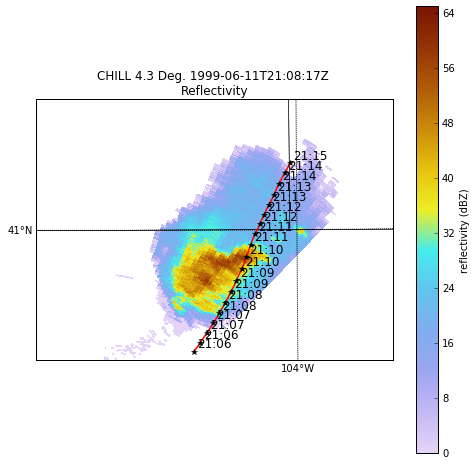

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8.0, 8.))
displayCHILL = pyart.graph.RadarMapDisplay(rCHILL)
#ax = fig.add_subplot(nrows, 2, index+1)
displayCHILL.plot_ppi_map('DZ', chsweep, vmin=0., vmax=65.,
            min_lon=lonlt28[0], max_lon=lonlt28[1], min_lat=latlt28[0], max_lat=latlt28[1],
            cmap='pyart_LangRainbow12',projection='aeqd', resolution='l',
            lat_0=chlat, lon_0=chlon, colorbar_flag=False, ax=ax1)
displayCHILL.plot_colorbar(ax=ax1)
f2 = FlightLevel(flt28, basemap=displayCHILL.basemap)
f2.plot_trackmap(min_altitude=50., lw=2.5, track_color='red',
                start_time=t28_set[0], end_time=t28_set[1],)
f2.time_stamps(start_time=t28_set[0], end_time=t28_set[1],
                           labelspacing=600)

In [8]:
rawotKUEX = awot.util.pyart_radar_to_awot(rKUEX)

In [9]:
rawotCHILL = awot.util.pyart_radar_to_awot(rCHILLj)

In [10]:
print(rawotKUEX['height']['data'].min(), rawotKUEX['height']['data'].max(), 
      fltKA['altitude']['data'].min(), fltKA['altitude']['data'].max())
print(rawotKUEX['time']['data'].min(), rawotKUEX['time']['data'].max(),
      fltKA['time']['data'].min(), fltKA['time']['data'].max())
print("------")
print(rawotCHILL['time']['data'].min(), rawotCHILL['time']['data'].max(),
      flt28['time']['data'].min(), flt28['time']['data'].max())

643.277199751 165671.28222 533.062 6411.47
2015-06-11 03:19:43.327000 2015-06-11 03:24:02.695000 2015-06-11 01:51:01 2015-06-11 03:21:04
------
1999-06-11 21:07:06 1999-06-11 21:16:32 1999-06-11 20:19:12 1999-06-11 21:45:03


In [10]:
matchKUEX = awot.util.TrackMatch(fltKA, rawotKUEX,
                           data_lon=rawotKUEX['longitude']['data'],
                           data_lat=rawotKUEX['latitude']['data'],
                           data_height=rawotKUEX['height']['data'],
                           data_time=rawotKUEX['time'],
                           start_time=uwka_set[0], end_time=uwka_set[1])

A --- 0.0774719715118 seconds ---
B --- 0.0931069850922 seconds ---


In [11]:
matchCHILL = awot.util.TrackMatch(flt28, rawotCHILL,
                           data_lon=rawotCHILL['longitude']['data'],
                           data_lat=rawotCHILL['latitude']['data'],
                           data_height=rawotCHILL['height']['data'],
                           data_time=rawotCHILL['time'],
                           start_time=t28_set[0], end_time=t28_set[1])

A --- 0.467813014984 seconds ---
B --- 0.485134840012 seconds ---


In [12]:
#kdKUEX2 = matchKUEX.kdtree(use_time=False, query_n_jobs=-1)
kdKUEX = matchKUEX.kdtree(use_time=True, print_match_pairs=False)

55
C --- 0.747412919998 seconds ---
D --- 0.747716903687 seconds ---
E --- 0.749246835709 seconds ---


In [13]:
kdCHILL = matchCHILL.kdtree(use_time=True, print_match_pairs=False)
#kdCHILL2 = matchCHILL.kdtree(use_time=False)

ValueError: operands could not be broadcast together with shapes (656000,) (5290400,) 

In [14]:
nntKUEX = matchKUEX.near_neighbor_tunnel()

In [29]:
nnpKUEX = matchKUEX.near_neighbor_pyart(rKUEX)

B --- 4.5800511837 seconds for loop 0---


In [11]:
nntCHILL = matchCHILL.near_neighbor_tunnel()

In [12]:
nnpCHILL = matchCHILL.near_neighbor_pyart(rflist)

B --- 5.13717103004 seconds for loop 0---
B --- 10.1427569389 seconds for loop 1---
B --- 14.8459239006 seconds for loop 2---
B --- 20.0357630253 seconds for loop 3---
B --- 25.0091350079 seconds for loop 4---
B --- 34.8412799835 seconds for loop 5---
B --- 42.5122599602 seconds for loop 6---
B --- 42.5312759876 seconds for loop 7---


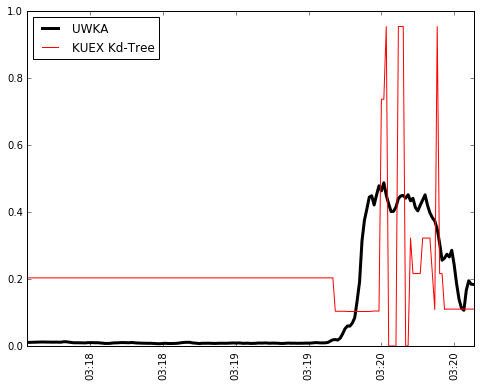

In [15]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(kdKUEX.flight['time']['data'], kdKUEX.flight['turb']['data'], 'k', ms=3, lw=3, label='UWKA')
plt.plot(kdKUEX.flight['time']['data'], kdKUEX.data['turbulence']['data'], 'r', ms=3, label='KUEX Kd-Tree')
#plt.plot(kdKUEX2.flight['time']['data'], kdKUEX2.data['turbulence']['data'], 'c', ms=3)#, label='KUEX Kd-Tree No Time')
#plt.plot(nntKUEX.flight['time']['data'], nntKUEX.data['turbulence']['data'], 'b', ms=3, label='KUEX Tunnel')
#plt.plot(kdKUEX.flight['time']['data'], nnpKUEX['turbulence']['data'], 'g', ms=3, label='KUEX Py-ART')
ax.set_ylim(0, 1)
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=90)
plt.legend(numpoints=3, loc='upper left')

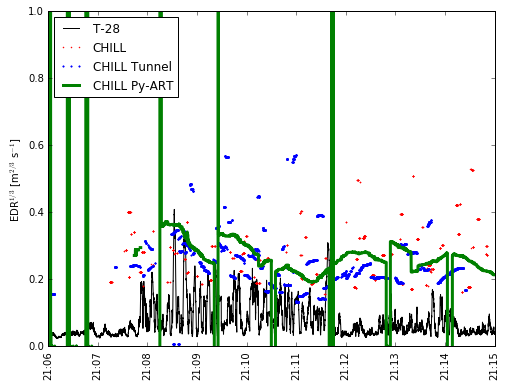

In [17]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(kdCHILL.flight['time']['data'], kdCHILL.flight['turb']['data']/100**(2/3), 'k', ms=2, label='T-28')
plt.plot(kdCHILL.flight['time']['data'], kdCHILL.data['turbulence']['data'], '.r', ms=2, label='CHILL')
plt.plot(nntCHILL.flight['time']['data'], nntCHILL.data['turbulence']['data'], '.b', ms=3, label='CHILL Tunnel')
plt.plot(kdCHILL.flight['time']['data'], nnpCHILL['turbulence']['data'], 'g', ms=3, lw=3, label='CHILL Py-ART')
#plt.plot(kdCHILL.flight['time']['data'], kdCHILL.data['turb_no_ntda']['data'], 'm')
ax.set_ylabel(r'EDR$^{1/3}$ [m$^{2/3}$ s$^{-1}$]')
ax.set_ylim(0, 1)
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=90)
plt.legend(numpoints=3, loc='upper left')

(array([ 1673.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9128.]),
 array([ -3.27680000e+04,   9.96920997e+35,   1.99384199e+36,
          2.99076299e+36,   3.98768399e+36,   4.98460498e+36,
          5.98152598e+36,   6.97844698e+36,   7.97536797e+36,
          8.97228897e+36,   9.96920997e+36]),
 <a list of 10 Patch objects>)

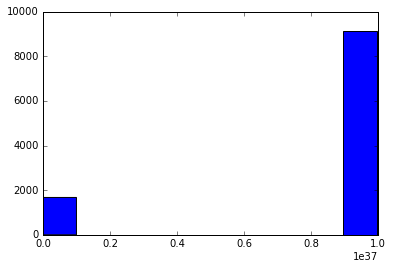

In [24]:
#len(kdKUEX.indices_1d), len(kdKUEX.distance_to_point), kdKUEX.data['turbulence']['data'].shape, kdKUEX.flight['turb']['data'].shape
matchCHILL.data_lon.shape, matchCHILL.data_time['data'].shape
#rawotKUEX['fields']['turbulence']['data'][kdKUEX.indices_1d].shape
#kdKUEX.data['turbulence']['data'].shape, rawotKUEX['fields']['turbulence']['data'].shape
rCHILL.time['data'].shape, rCHILL.azimuth['data'].shape, rCHILL.range['data'].shape
nnpCHILL['turbulence']['data'].min(), nnpCHILL['turbulence']['data'].max()
#getattr(rCHILL.time)
plt.hist(kdCHILL.data['turbulence']['data'])

In [21]:
fltKA.keys()

['mixing_ratio',
 'swbottom',
 'pcasp_mean_diam',
 'pressure_altitude',
 'thetae',
 'irtop',
 'irbottom',
 'pcasp_num',
 'Uwind',
 'pitch',
 'pcasp_conc',
 'latitudinal_wind',
 'pcasp_surf_area_conc',
 'g_accel',
 'tas',
 'temperature',
 'wind_spd',
 'altitude',
 'true_heading',
 'platform',
 'flight_number',
 'co2_conc',
 'lwc',
 'h2o_conc',
 'ias',
 'Vwind',
 'swtop',
 'conc_cpc',
 'topo',
 'pressure',
 'thetad',
 'roll_angle',
 'Wwind',
 'longitudinal_wind',
 'dewpoint_temperature',
 'wind_dir',
 'latitude',
 'longitude',
 'pcasp_vol_conc',
 'project',
 'relative_humidity',
 'time',
 'turb']

In [22]:
fltKA, rawotKUEX
np.logical_and(rawotKUEX['longitude']['data'].ravel() >= np.min(fltKA['longitude']['data'][:]),
               rawotKUEX['longitude']['data'].ravel() <= np.max(fltKA['longitude']['data'][:]))
cond = ((rawotKUEX['longitude']['data'].ravel() >= np.min(fltKA['longitude']['data'][:])) &
        (rawotKUEX['longitude']['data'].ravel() <= np.max(fltKA['longitude']['data'][:])) &
        (rawotKUEX['latitude']['data'].ravel() >= np.min(fltKA['latitude']['data'][:])) &
        (rawotKUEX['latitude']['data'].ravel() <= np.max(fltKA['latitude']['data'][:])) &
        (rawotKUEX['height']['data'].ravel() >= np.min(fltKA['altitude']['data'][:])) &
        (rawotKUEX['height']['data'].ravel() <= np.max(fltKA['altitude']['data'][:])))

In [23]:
#nnpCHILL['turbulence']['units'], kdCHILL.flight['turb']['units'], fltKA['turb']['units']
len(np.where(cond)[0])

592508

IndexError: too many indices for array

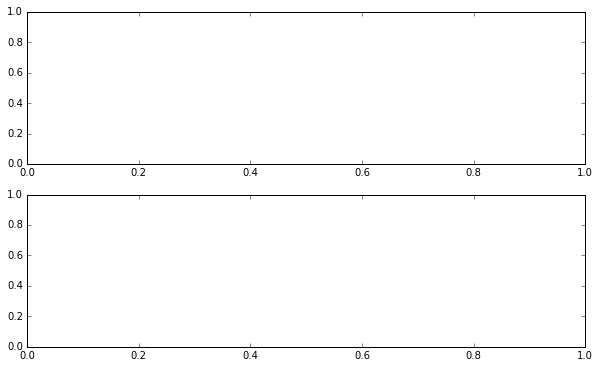

In [14]:
fig, (axXS1, axXS2) = plt.subplots(2, 1, figsize=(10,6))
f = FlightLevel(fltKA, basemap=displayKUEX.basemap)
f.plot_radar_cross_section(rawotKUEX, 'REF', cmap='pyart_LangRainbow12', cminmax=reflim,
                           start_time=uwka_set[0], end_time=uwka_set[1], ax=axXS1)
f.plot_radar_cross_section(rawotKUEX, 'SW', cmap='nipy_spectral', cminmax=turblim,
                           start_time=uwka_set[0], end_time=uwka_set[1], ax=axXS1)

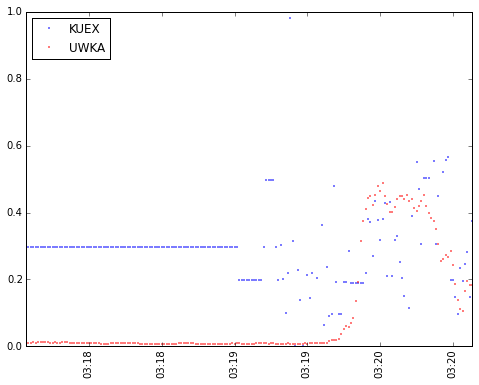

In [25]:
import matplotlib.dates as md
fig,ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(kdKUEX.flight['time']['data'], kdKUEX.data['turbulence']['data'], '.b', 
         ms=2, label='KUEX')
plt.plot(kdKUEX.flight['time']['data'], kdKUEX.flight['turb']['data'], '.r', 
         ms=2, label='UWKA')
#plt.plot(nnKUEX.flight['time']['data'], nnKUEX.data['turbulence']['data'], 'og')
ax.set_ylim(0, 1)
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=90)
plt.legend(numpoints=1, loc='upper left')

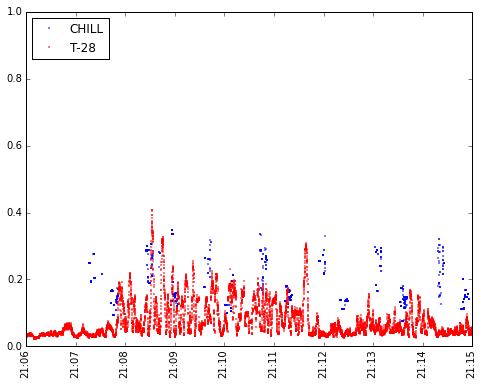

In [23]:
fig,ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(kdCHILL.flight['time']['data'], kdCHILL.data['turbulence']['data'], '.b', 
         ms=2, label='CHILL')
plt.plot(kdCHILL.flight['time']['data'], kdCHILL.flight['turb']['data']/100**0.6666667, '.r', 
         ms=2, label='T-28')
#plt.plot(nnCHILL.flight['time']['data'], nnCHILL.data['turb_no_ntda']['data'], '.g'))
ax.set_ylim(0, 1)
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks(rotation=90)
plt.legend(numpoints=1, loc='upper left')

In [10]:
 def calc_latlon_time(radar, basemap=None):
    rng, az = np.meshgrid(radar.range['data'], radar.azimuth['data'])
    rng, ele = np.meshgrid(radar.range['data'], radar.elevation['data'])
    try:
        rng, time = np.meshgrid(radar.range['data'], radar.time['data'])
    except:
        rng, time = np.meshgrid(radar.range['data'], date2num(radar.time['data'], radar.time['units']))
        
    theta_e = np.radians(ele)       # elevation angle in radians.
    theta_a = np.radians(az)        # azimuth angle in radians.
    Re = 6371000. * 4.0 / 3.0     # effective radius of earth in meters.

    z = (rng ** 2 + Re ** 2 + 2.0 * rng * Re * np.sin(theta_e)) ** 0.5 - Re
    s = Re * np.arcsin(rng * np.cos(theta_e) / (Re + z))  # arc length in m.
    x = s * np.sin(theta_a)
    y = s * np.cos(theta_a)
 
    if basemap is not None:
        lon, lat = basemap(x, y, inverse=True)
    else:
        c = np.sqrt(x*x + y*y) / rng
        phi_0 = np.radians(radar.latitude['data'])
        azi = np.arctan2(y, x)  # from east to north

        lat = np.degrees(np.arcsin(np.cos(c) * np.sin(phi_0) +
                        np.sin(azi) * np.sin(c) * np.cos(phi_0)))
        lon = np.degrees(np.arctan2(np.cos(azi) * np.sin(c), np.cos(c) * np.cos(phi_0) -
               np.sin(azi) * np.sin(c) * np.sin(phi_0))) + radar.longitude['data']
        lon = np.fmod(lon + 180, 360) - 180

    lat_axis = {
        'data':  lat,
        'long_name': 'Latitude for points in Cartesian system',
        'axis': 'YX',
        'units': 'degree_N',
        'standard_name': 'latitude',
    }

    lon_axis = {
        'data': lon,
        'long_name': 'Longitude for points in Cartesian system',
        'axis': 'YX',
        'units': 'degree_E',
        'standard_name': 'longitude',
    }
    
    time2D = {
        'data': time,
        'long_name': radar.time['long_name'],
        'units': radar.time['units'],
        'standard_name': radar.time['standard_name'],
    }
    return lat_axis, lon_axis, time2D

def calculate_gate_locations(radar, basemap=None):
    rlat, rlon = radar.latitude['data'][0], radar.longitude['data'][0]
    ralt = radar.altitude['data'][0]
    gate_lat, gate_lon, gate_time = calc_latlon_time(radar, basemap=basemap)
    delLat = rlat - gate_lat['data'][:]
    delLon = rlon - gate_lon['data'][:]
    R = 6371000.
    a = (np.sin(np.radians(delLat)/2))**2 + np.cos(np.radians(rlat)) * np.cos(np.radians(rlat)) * (np.sin(np.radians(delLon)/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c

    rng, elevs = np.meshgrid(radar.range['data'], radar.elevation['data'])
    
#    gate_heights = np.empty_like(d)
#    for nn in range(radar.ngates):
#        gate_heights[:, nn] = pyradarmet.geometry.ray_height(d[:, nn], elevs, radar.altitude['data'][0])
    gate_heights = pyradarmet.geometry.ray_height(d, elevs, ralt)
    gate_height = {
        'data': gate_heights,
        'long_name': 'Height of center of gate in Cartesian system',
        'units': 'meters',
        'standard_name': 'Gate height',
    }
    return gate_lat, gate_lon, gate_height, gate_time